In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [3]:
df1=pd.read_csv("indian customer data.csv")
data_copy=df1
df1.head()

,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,0,30,Nabha,None,Single,Graduate,5,1.193876e+06,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,1,27,Pune,None,Single,Graduate,4,1.844540e+06,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,2,32,Kashipur,None,Single,Graduate,4,2.948150e+06,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,3,55,Pune,Business,Single,Graduate,3,2.832380e+06,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,4,26,Satara,None,Single,Graduate,4,2.638751e+06,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


In [4]:
print(df1.columns)

Index(['Unnamed: 0', 'Age', 'City', 'Profession', 'Marital Status',
       'Education', 'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of  EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')


In [5]:
df1.drop('Unnamed: 0',axis=1,inplace=True)  # Unnamed: 0 column is indicating the index, which has no use so drop it.

In [6]:
df1.shape

(1000, 14)

In [7]:
df1.describe()

,Age,No. of Family members,Annual Income,Preference for wheels in EV
count,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,31.800000,4.118000,2.258342e+06,3.349000
std,11.294847,1.469774,9.993558e+05,0.887686
min,15.000000,0.000000,-3.761509e+05,2.000000
25%,26.000000,4.000000,1.782116e+06,2.000000
50%,29.000000,4.000000,2.329246e+06,4.000000
75%,31.000000,5.000000,2.753170e+06,4.000000
max,118.000000,8.000000,1.282128e+07,4.000000


# Checking for Null Values

In [8]:
df1.isnull().sum()            # Hurrah! We don't have Null Values

Age                                                                     0
City                                                                    0
Profession                                                              0
Marital Status                                                          0
Education                                                               0
No. of Family members                                                   0
Annual Income                                                           0
Would you prefer replacing all your vehicles to Electronic vehicles?    0
If Yes/Maybe what type of  EV would you prefer?                         0
Do you think Electronic Vehicles are economical?                        0
Which brand of vehicle do you currently own?                            0
How much money could you spend on an Electronic vehicle?                0
Preference for wheels in EV                                             0
Do you think Electronic vehicles will 

# Performing EDA

<ipython-input-9-143105724266>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1["Age"])


<Axes: xlabel='Age', ylabel='Density'>

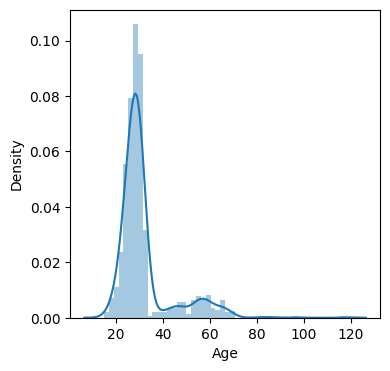

In [9]:
plt.figure(figsize=(4,4))
sns.distplot(df1["Age"])


In [10]:
df1["City"].unique()    #Oh No! pune is entered in many ways, so we have to correct this

array(['Nabha', 'Pune', 'Kashipur ', 'Satara', 'Noida', 'Delhi', 'Mumbai',
       'pune', 'solapur', 'Haldwani ', 'Nellore ', 'Pune ', 'Haldwani',
       'Banglore ', 'Faridabad ', 'Nagpur', 'Chandrapur ', 'Chennai',
       'Gurugram ', 'Nashik', 'Bengaluru', 'Mumbai ', 'Hakdwani',
       'Patiyala', 'pUNE', 'Ahmedabad', 'Karnal', 'Rewari', 'New Delhi',
       'Serampore', 'Jhansi', 'New Delhi ', 'Jalandhar', 'Delhi ',
       'nashik'], dtype=object)

In [11]:
df1["City"]=df1["City"].replace({"Pune ":"Pune","pUNE":"Pune","pune":"Pune","Pune":"Pune"})
df1["City"]=df1["City"].replace({"Banglore ":"Bengaluru"})
df1["City"]=df1["City"].replace({"Hakdwani":"Haldwani","Haldwani ":"Haldwani"})
df1["City"]=df1["City"].replace({"New Delhi ":"Delhi","Delhi ":"Delhi"})
df1["City"]=df1["City"].replace({"nashik":"Nashik"})
df1["City"]=df1["City"].replace({"Mumbai ":"Mumbai"})

In [12]:
df1["City"].unique()

array(['Nabha', 'Pune', 'Kashipur ', 'Satara', 'Noida', 'Delhi', 'Mumbai',
       'solapur', 'Haldwani', 'Nellore ', 'Bengaluru', 'Faridabad ',
       'Nagpur', 'Chandrapur ', 'Chennai', 'Gurugram ', 'Nashik',
       'Patiyala', 'Ahmedabad', 'Karnal', 'Rewari', 'New Delhi',
       'Serampore', 'Jhansi', 'Jalandhar'], dtype=object)

<Axes: xlabel='City', ylabel='count'>

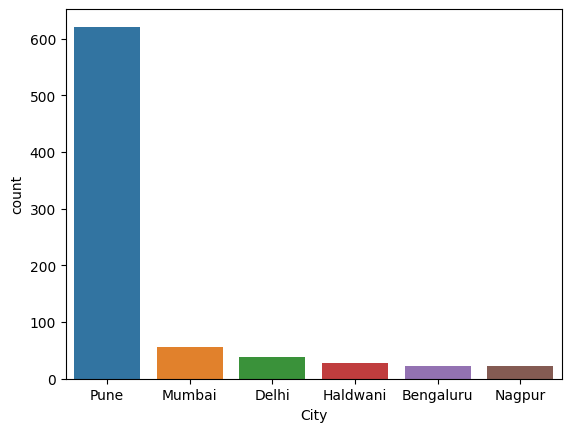

In [13]:
sns.countplot(x='City',data=df1,order=df1['City'].value_counts().iloc[:6].index)

<Axes: ylabel='Profession'>

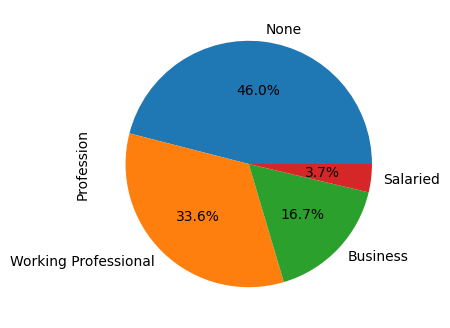

In [14]:
plt.figure(figsize=(4,4))
df1["Profession"].value_counts().plot(kind="pie",autopct="%0.1f%%")

In [15]:
df1['Education'].unique()

array(['Graduate', 'Post Graduate'], dtype=object)

<Axes: ylabel='Education'>

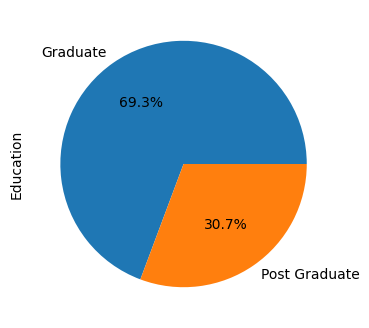

In [16]:
plt.figure(figsize=(4,4))
df1["Education"].value_counts().plot(kind="pie",autopct="%0.1f%%")

<Axes: >

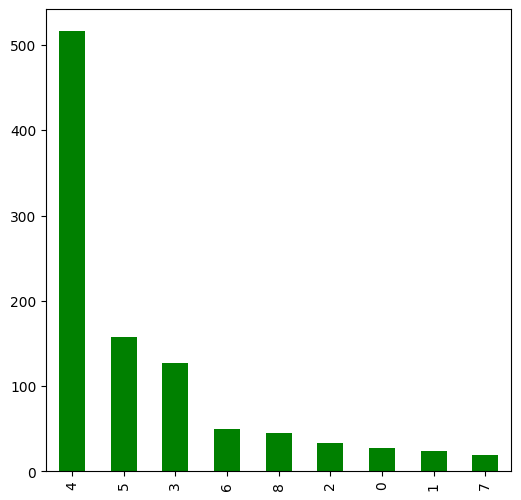

In [17]:
plt.figure(figsize=(6,6))
df1["No. of Family members"].value_counts().plot(kind="bar",color="green")

<Axes: xlabel='Annual Income', ylabel='Count'>

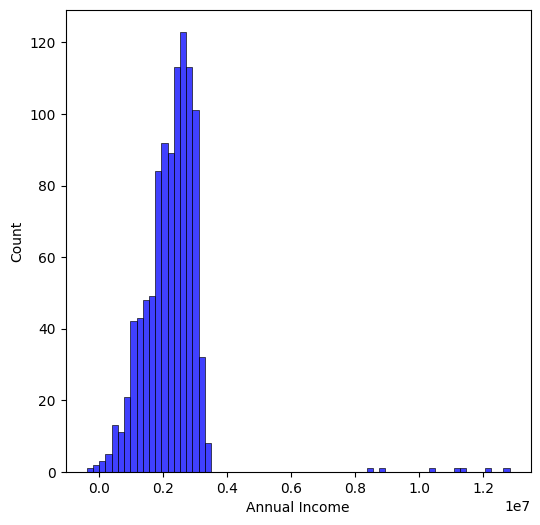

In [18]:
plt.figure(figsize=(6,6))
sns.histplot(df1["Annual Income"],color="blue")

<Axes: ylabel='Would you prefer replacing all your vehicles to Electronic vehicles?'>

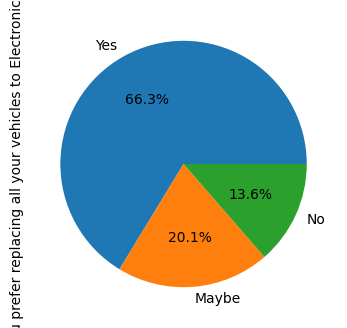

In [19]:
plt.figure(figsize=(4,4))
df1["Would you prefer replacing all your vehicles to Electronic vehicles?"].value_counts().plot(kind="pie",autopct="%0.1f%%")

<Axes: ylabel='Preference for wheels in EV'>

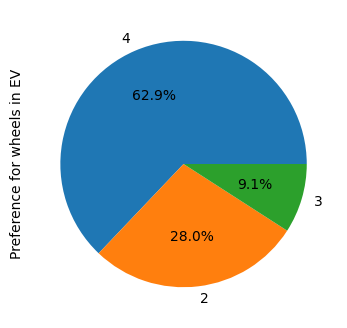

In [20]:
plt.figure(figsize=(4,4))
df1["Preference for wheels in EV"].value_counts().plot(kind="pie",autopct="%0.1f%%")

<Axes: >

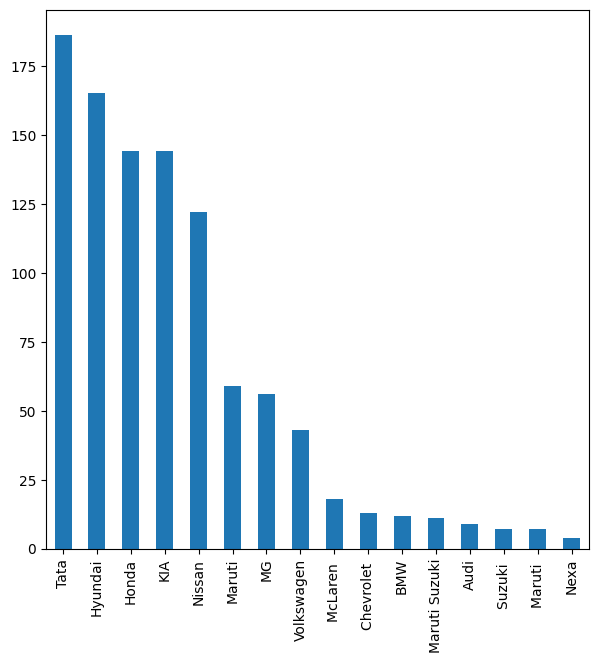

In [21]:
plt.figure(figsize=(7,7))
df1["Which brand of vehicle do you currently own?"].value_counts().plot(kind="bar")


<Axes: xlabel='Education', ylabel='count'>

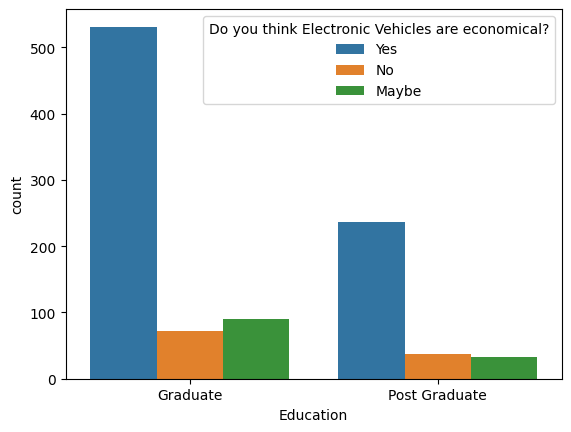

In [22]:
sns.countplot(x="Education",data=df1,hue="Do you think Electronic Vehicles are economical?")

<Axes: xlabel='No. of Family members', ylabel='count'>

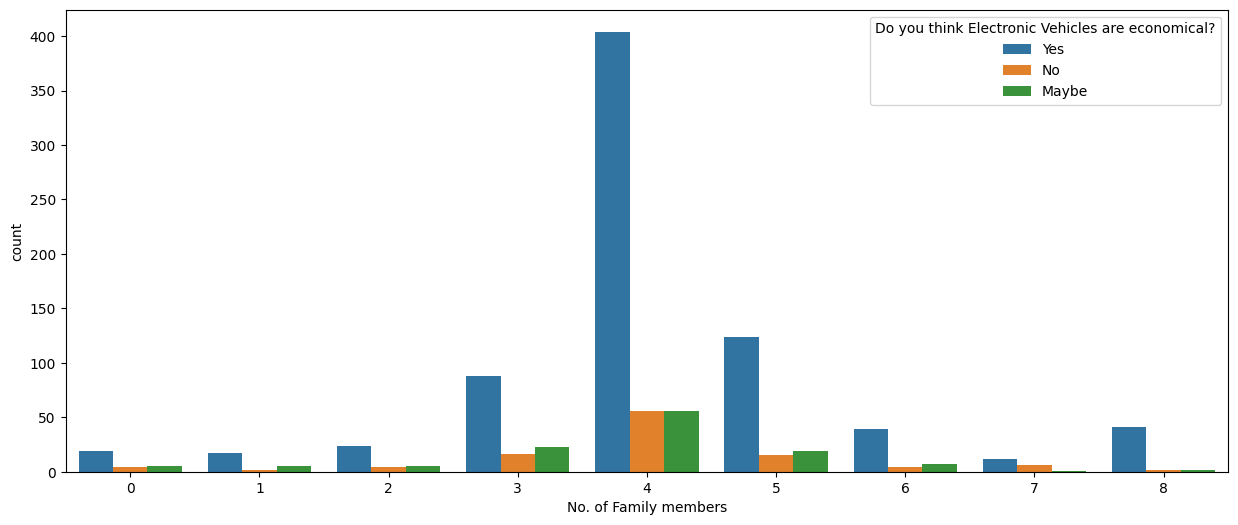

In [23]:
plt.figure(figsize=(15,6))
sns.countplot(x="No. of Family members",data=df1,hue="Do you think Electronic Vehicles are economical?")

<Axes: xlabel='No. of Family members', ylabel='count'>

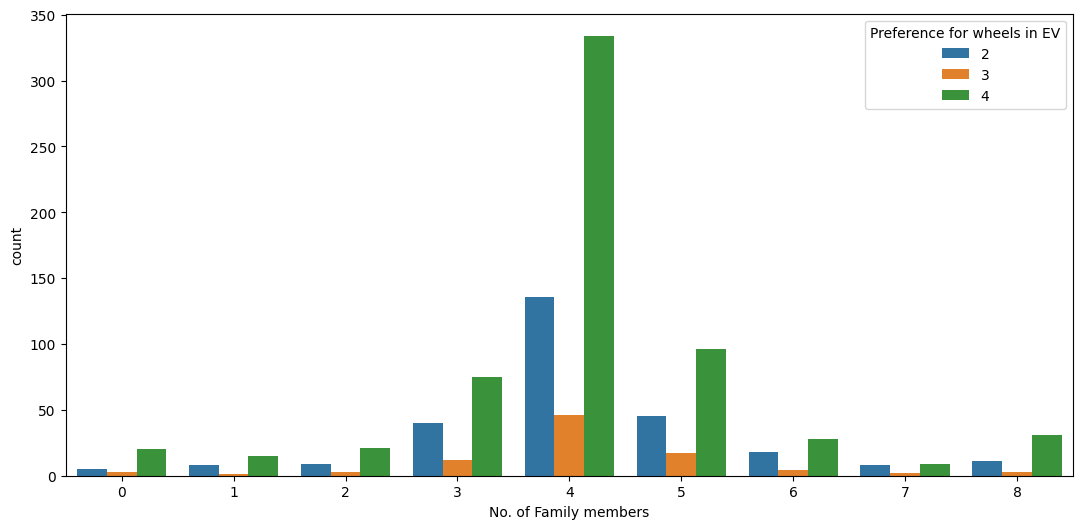

In [24]:
plt.figure(figsize=(13,6))
sns.countplot(x="No. of Family members",data=df1,hue="Preference for wheels in EV")


<Axes: xlabel='Which brand of vehicle do you currently own?', ylabel='count'>

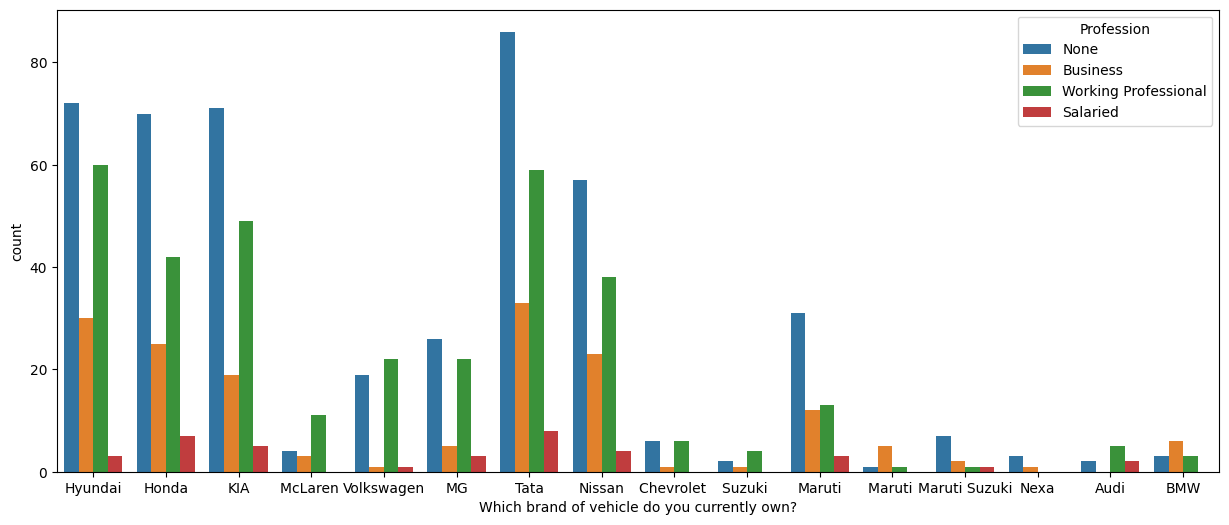

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(x="Which brand of vehicle do you currently own?",data=df1,hue="Profession")

# Lets Observe Correlation between attributes


<ipython-input-26-a8072edbd434>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


<Axes: >

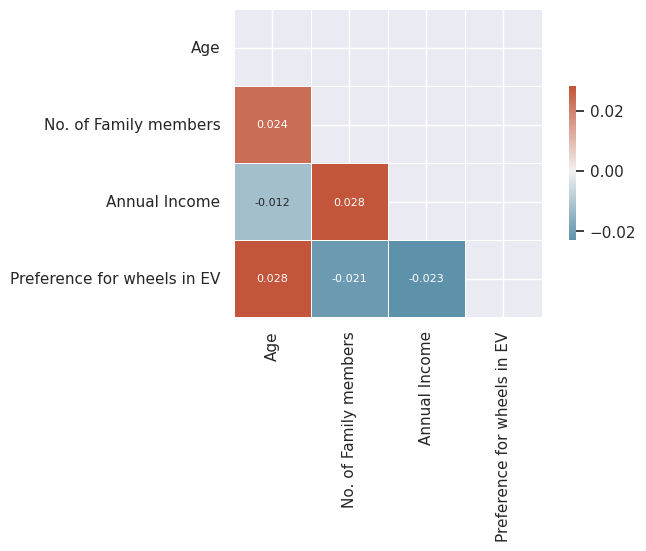

In [26]:
sns.set_theme(style="darkgrid")

# Compute the correlation matrix
corr = df1.corr()

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 4))

# Generate a custom diverging colormap (choose colors here)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})

# Order and Label Encoding

In [27]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
def label_encoder(data,column):
    label_encoder=LabelEncoder()
    return label_encoder.fit_transform(data[column].astype(str))

In [28]:
df1['City']= label_encoder(df1,'City')
df1['Profession']= label_encoder(df1,'Profession')
df1['Marital Status']= label_encoder(df1,'Marital Status')
df1['Education']= label_encoder(df1,'Education')
df1['Would you prefer replacing all your vehicles to Electronic vehicles?']= label_encoder(df1,'Would you prefer replacing all your vehicles to Electronic vehicles?')
df1['If Yes/Maybe what type of  EV would you prefer?']= label_encoder(df1,'If Yes/Maybe what type of  EV would you prefer?')
df1['Do you think Electronic Vehicles are economical?']= label_encoder(df1,'Do you think Electronic Vehicles are economical?')
df1['Which brand of vehicle do you currently own?']= label_encoder(df1,'Which brand of vehicle do you currently own?')
df1['Do you think Electronic vehicles will replace fuel cars in India?']= label_encoder(df1,'Do you think Electronic vehicles will replace fuel cars in India?')
df1['How much money could you spend on an Electronic vehicle?']= label_encoder(df1,'How much money could you spend on an Electronic vehicle?')


In [29]:
df1.head()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,13,1,1,0,5,1.193876e+06,0,3,2,4,6,2,0
1,27,20,1,1,0,4,1.844540e+06,2,3,2,3,4,4,2
2,32,11,1,1,0,4,2.948150e+06,2,1,2,5,4,4,2
3,55,20,0,1,0,3,2.832380e+06,0,1,1,4,6,4,1
4,26,22,1,1,0,4,2.638751e+06,2,4,2,10,4,4,2


# Implement the PCA


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [31]:
data=df1.copy()

In [32]:
data.head()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,13,1,1,0,5,1.193876e+06,0,3,2,4,6,2,0
1,27,20,1,1,0,4,1.844540e+06,2,3,2,3,4,4,2
2,32,11,1,1,0,4,2.948150e+06,2,1,2,5,4,4,2
3,55,20,0,1,0,3,2.832380e+06,0,1,1,4,6,4,1
4,26,22,1,1,0,4,2.638751e+06,2,4,2,10,4,4,2


In [33]:
scaler = StandardScaler()  #creating the instance of class StandardScaler()
df_re_nonull_std = scaler.fit_transform(data)    #standardizing the data

df_re_nonull_std.shape

(1000, 14)

In [34]:
pca = PCA()    #creating the instance of class PCA
pca.fit_transform(df_re_nonull_std)    # creating the pricipal component with 14 component as we are not passing any argument in PCA()

array([[-2.17408153, -1.1100224 ,  0.0270743 , ..., -0.49379788,
         0.31979991, -0.11915664],
       [-0.21166691, -0.56369508,  0.17620032, ..., -0.80407692,
        -0.35372126,  0.66169274],
       [-0.54592976,  0.83144027,  0.29384334, ..., -0.15420079,
        -0.84506772,  0.48789339],
       ...,
       [-0.54609894,  0.28228015,  0.62090619, ..., -1.06018687,
        -0.43730904,  0.7803745 ],
       [-0.13219961,  0.97879183,  0.14693272, ...,  0.13505963,
        -0.81783553, -0.90899985],
       [-0.79878698, -0.01902207, -0.05247042, ..., -1.80694166,
        -1.1108108 ,  0.35410049]])

In [35]:
pca.explained_variance_ratio_ #it will tell the variance captured by all the pricipal component

array([0.08550678, 0.08176578, 0.07887437, 0.07656827, 0.07504033,
       0.0727662 , 0.07123938, 0.07092723, 0.06768923, 0.06664602,
       0.06457744, 0.06396107, 0.0632045 , 0.06123339])

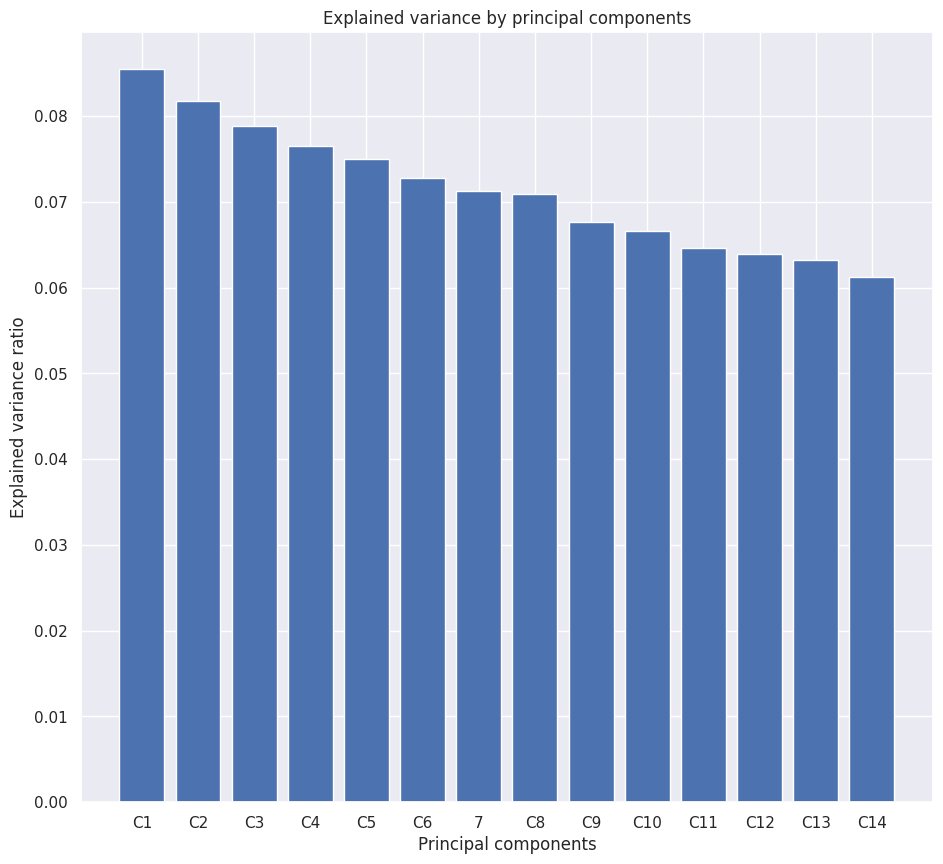

In [36]:
plt.figure(figsize = (11,10))
components = ['C1','C2','C3','C4','C5','C6','7','C8','C9','C10','C11','C12','C13','C14']
var_exp = pca.explained_variance_ratio_
plt.bar(components, var_exp)
plt.title('Explained variance by principal components')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.show()

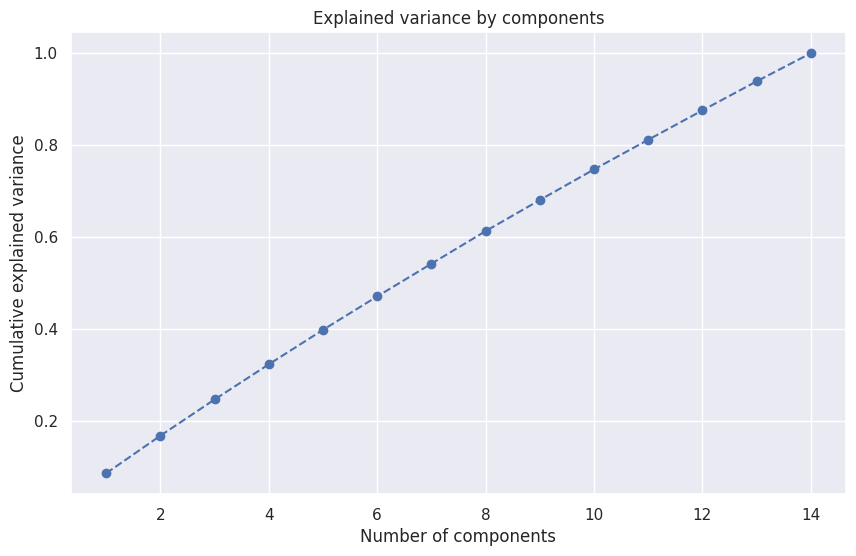

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),pca.explained_variance_ratio_.cumsum(),marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [38]:
pca = PCA(n_components=10)

In [39]:
pca.fit(df_re_nonull_std)

PCA(n_components=10)

In [40]:
pca.components_

array([[-0.18005812,  0.08203154,  0.2265259 ,  0.0262388 ,  0.13531731,
        -0.46925552,  0.06824702,  0.49732787,  0.20712476, -0.43000967,
         0.41115344, -0.03247446,  0.14107877, -0.02300708],
       [ 0.27020351, -0.21117011, -0.49337389, -0.37878665,  0.17388065,
        -0.2844963 ,  0.14932889, -0.08925003, -0.38645844, -0.1541739 ,
         0.15587451, -0.39134648,  0.02167288,  0.05499502],
       [-0.30193182, -0.06164438, -0.31484775,  0.03186625, -0.24040042,
         0.0406445 ,  0.45177916,  0.10976141,  0.12449127, -0.32274048,
        -0.23911754,  0.13106337, -0.47505452,  0.33106672],
       [-0.35616897,  0.04889611, -0.02285922,  0.35366039,  0.58476012,
        -0.0401722 , -0.11694583, -0.03070645, -0.42667943,  0.1759263 ,
         0.14121875,  0.10556821, -0.21575073,  0.31038049],
       [ 0.26797722,  0.59594063, -0.02019327, -0.13322424,  0.16437679,
         0.36002235,  0.49131294,  0.0476516 , -0.04742056,  0.06241205,
         0.34676478,  0.15

In [41]:
pca = PCA(n_components=10)
pca_data=pca.fit_transform(df_re_nonull_std)
data2 = pd.DataFrame(pca_data, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
data2.head()



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.174082,-1.110022,0.027074,-0.238558,-0.944734,2.034612,-0.927647,-0.890108,-0.720110,0.168826
1,-0.211667,-0.563695,0.176200,-0.120479,-0.660005,-0.421739,1.240349,0.516664,-0.171345,-0.462336
2,-0.545930,0.831440,0.293843,0.384132,-0.645152,-0.041323,0.962848,0.810853,1.690813,-0.651204
3,-1.405464,1.384414,-0.165708,-0.635804,0.536367,0.109191,0.366991,-2.425968,0.927282,-1.052465
4,0.716821,-0.660876,0.288619,-0.348156,0.396667,-0.206083,1.310327,0.590887,-0.347553,0.872608


In [42]:
df_pca_comp = pd.DataFrame(data=pca.components_,
                        columns=data.columns.values,
                        index=['Component 1','Component 2','Component 3','Component 4','Component 5','Component 6',
                               'Component 7', 'Component 8','Component 9','Component 10'])
df_pca_comp

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
Component 1,-0.180058,0.082032,0.226526,0.026239,0.135317,-0.469256,0.068247,0.497328,0.207125,-0.430010,0.411153,-0.032474,0.141079,-0.023007
Component 2,0.270204,-0.211170,-0.493374,-0.378787,0.173881,-0.284496,0.149329,-0.089250,-0.386458,-0.154174,0.155875,-0.391346,0.021673,0.054995
Component 3,-0.301932,-0.061644,-0.314848,0.031866,-0.240400,0.040644,0.451779,0.109761,0.124491,-0.322740,-0.239118,0.131063,-0.475055,0.331067
Component 4,-0.356169,0.048896,-0.022859,0.353660,0.584760,-0.040172,-0.116946,-0.030706,-0.426679,0.175926,0.141219,0.105568,-0.215751,0.310380
Component 5,0.267977,0.595941,-0.020193,-0.133224,0.164377,0.360022,0.491313,0.047652,-0.047421,0.062412,0.346765,0.157787,-0.034971,-0.045630
Component 6,0.064744,-0.120602,-0.195864,0.340558,-0.127061,0.057424,-0.082792,0.185875,-0.079030,0.052677,0.259387,-0.103831,-0.507527,-0.649159
Component 7,-0.045279,0.369855,-0.004649,0.450335,-0.396145,0.049152,-0.018705,-0.073418,-0.152209,-0.076247,0.065427,-0.614111,0.160204,0.239137
Component 8,-0.493953,-0.129149,0.078518,-0.241385,0.080317,0.173243,0.333714,0.315720,-0.002992,0.434077,-0.122262,-0.407122,0.147147,-0.191341
Component 9,0.243711,-0.518753,0.147720,0.365651,-0.053362,0.277045,0.338160,0.214821,-0.315802,-0.143440,0.029282,0.170685,0.349370,0.059333
Component 10,-0.043291,-0.331730,-0.140578,0.161554,0.072974,0.064934,0.147378,-0.376591,0.561244,0.205594,0.514526,-0.104512,0.044811,0.184944


# Dendogram

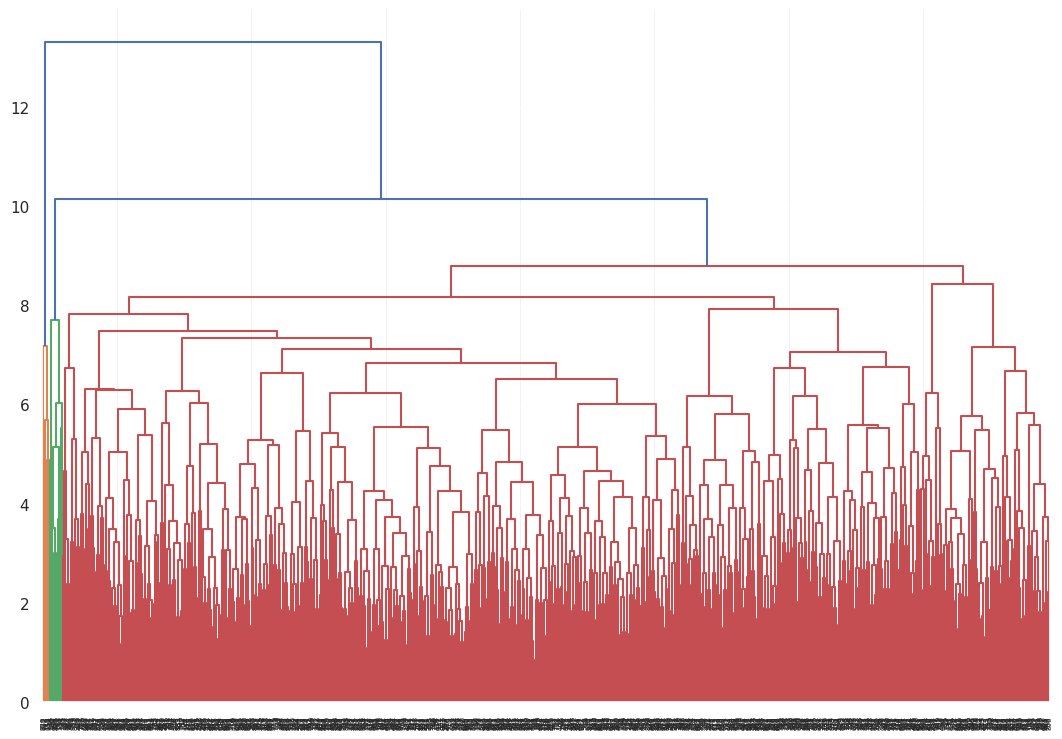

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(pca_data, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()



# Finding Number of Clusters using Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

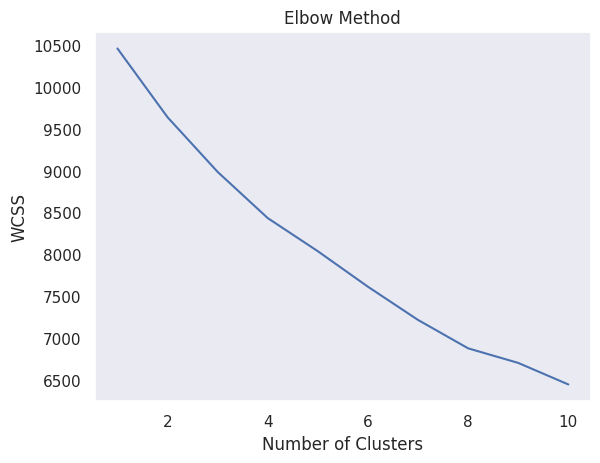

In [44]:
from sklearn.cluster import KMeans

# Determine the number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid()
plt.show()



# Applying KMeans Algorithm

In [45]:
# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

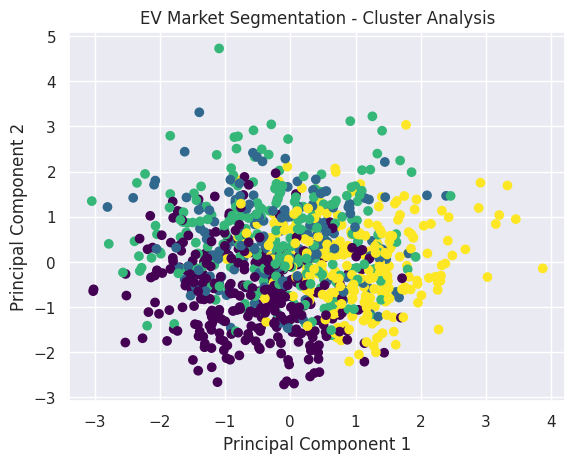

In [46]:
# Add the cluster labels to the dataset
data2['Cluster'] = kmeans.labels_
# Visualize the clusters
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data2['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('EV Market Segmentation - Cluster Analysis')
plt.show()

# Making Prediction

In [47]:
kmeans_predict=KMeans(n_clusters=4,random_state=123)
clusters=kmeans_predict.fit_predict(data2)
data_copy["Clusters"]=clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
data_copy.tail()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,Clusters
995,31,20,1,0,0,7,2.110722e+06,2,3,2,5,5,4,1,3
996,29,20,1,0,1,4,1.616288e+06,1,3,2,5,6,4,2,3
997,30,12,0,1,0,4,2.202829e+06,2,3,2,3,4,4,2,1
998,24,0,1,0,0,4,1.764744e+06,2,3,2,7,4,4,2,1
999,30,20,0,1,0,4,2.486664e+06,1,2,2,8,6,4,1,0


In [49]:
data_copy["Clusters"].value_counts()

0    320
2    259
3    253
1    168
Name: Clusters, dtype: int64

In [50]:
data_copy["City"]=data_copy["City"].replace({"Pune ":"Pune","pUNE":"Pune","pune":"Pune","Pune":"Pune"})
data_copy["City"]=data_copy["City"].replace({"Banglore ":"Bengaluru"})
data_copy["City"]=data_copy["City"].replace({"Hakdwani":"Haldwani","Haldwani ":"Haldwani"})
data_copy["City"]=data_copy["City"].replace({"New Delhi ":"Delhi","Delhi ":"Delhi"})
data_copy["City"]=data_copy["City"].replace({"nashik":"Nashik"})
data_copy["City"]=data_copy["City"].replace({"Mumbai ":"Mumbai"})

# Bifurcating the data according to the cluster

In [51]:
Cluster_0=data_copy[data_copy.Clusters==0]
Cluster_1=data_copy[data_copy.Clusters==1]
Cluster_2=data_copy[data_copy.Clusters==2]
Cluster_3=data_copy[data_copy.Clusters==3]

# Demographic Segments

In [52]:
[Cluster_0["Age"].value_counts().head(),
Cluster_1["Age"].value_counts().head(),
Cluster_2["Age"].value_counts().head(),
Cluster_3["Age"].value_counts().head()]

# Age group of 28-31 needs to be targeted

[29    41
 28    36
 27    28
 30    26
 26    26
 Name: Age, dtype: int64,
 30    20
 28    18
 31    17
 27    17
 29    15
 Name: Age, dtype: int64,
 30    34
 28    30
 29    26
 25    24
 27    23
 Name: Age, dtype: int64,
 29    34
 31    32
 30    25
 27    19
 26    19
 Name: Age, dtype: int64]

# Profession

In [53]:
[Cluster_0["Profession"].value_counts().head(),
Cluster_1["Profession"].value_counts().head(),
Cluster_2["Profession"].value_counts().head(),
Cluster_3["Profession"].value_counts().head()]

[1    151
 3    106
 0     49
 2     14
 Name: Profession, dtype: int64,
 1    82
 3    46
 0    35
 2     5
 Name: Profession, dtype: int64,
 3    113
 1    107
 0     28
 2     11
 Name: Profession, dtype: int64,
 1    120
 3     71
 0     55
 2      7
 Name: Profession, dtype: int64]

# Education

In [54]:
[Cluster_0["Education"].value_counts().head(),
Cluster_1["Education"].value_counts().head(),
Cluster_2["Education"].value_counts().head(),
Cluster_3["Education"].value_counts().head()]

# Graduate people needs to be targeted most

[0    282
 1     38
 Name: Education, dtype: int64,
 0    119
 1     49
 Name: Education, dtype: int64,
 1    156
 0    103
 Name: Education, dtype: int64,
 0    189
 1     64
 Name: Education, dtype: int64]

# Income group

In [55]:
[Cluster_0["Annual Income"].mean(),
Cluster_1["Annual Income"].mean(),
Cluster_2["Annual Income"].mean(),
Cluster_3["Annual Income"].mean()]

# Cluster 2 has the highest average income, followed by cluster 3,1,0


[2207931.4082911005, 2171296.1099393917, 2332636.085258727, 2303846.958786252]

# Geographic Segments

In [56]:
[Cluster_0["City"].value_counts().head(),
Cluster_1["City"].value_counts().head(),
Cluster_2["City"].value_counts().head(),
Cluster_3["City"].value_counts().head()]

[20    234
 12     18
 22     11
 17      8
 16      8
 Name: City, dtype: int64,
 4    38
 7    26
 1    23
 3    15
 2    12
 Name: City, dtype: int64,
 20    193
 12     19
 17      6
 15      6
 21      5
 Name: City, dtype: int64,
 20    194
 14     10
 12     10
 22      6
 17      5
 Name: City, dtype: int64]

# Psychographic segments

**Marital Status**

In [57]:
[Cluster_0["Marital Status"].value_counts().head(),
Cluster_1["Marital Status"].value_counts().head(),
Cluster_2["Marital Status"].value_counts().head(),
Cluster_3["Marital Status"].value_counts().head()]

# Single People should be the targeted

[1    316
 0      4
 Name: Marital Status, dtype: int64,
 1    103
 0     65
 Name: Marital Status, dtype: int64,
 1    217
 0     42
 Name: Marital Status, dtype: int64,
 0    251
 1      2
 Name: Marital Status, dtype: int64]

# EV type Preference

In [58]:
[Cluster_0["Preference for wheels in EV"].value_counts().head(),
Cluster_1["Preference for wheels in EV"].value_counts().head(),
Cluster_2["Preference for wheels in EV"].value_counts().head(),
Cluster_3["Preference for wheels in EV"].value_counts().head()]

# 4 wheeler are more preferred EV vehicle in the market
# Followed by 2 wheeler and 3 wheeler


[4    173
 2    118
 3     29
 Name: Preference for wheels in EV, dtype: int64,
 4    106
 2     46
 3     16
 Name: Preference for wheels in EV, dtype: int64,
 4    179
 2     54
 3     26
 Name: Preference for wheels in EV, dtype: int64,
 4    171
 2     62
 3     20
 Name: Preference for wheels in EV, dtype: int64]

In [59]:
[Cluster_0['Which brand of vehicle do you currently own?'].value_counts().head(),
 Cluster_1['Which brand of vehicle do you currently own?'].value_counts().head(),
 Cluster_2['Which brand of vehicle do you currently own?'].value_counts().head(),
 Cluster_3['Which brand of vehicle do you currently own?'].value_counts().head()]

# Tata is the most preferred brand in all the cluster
# Hyundai and KIA is the 2nd best preferred brand in the market
# Followed by Honda and Nissian


[4     77
 3     61
 5     56
 6     24
 14    23
 Name: Which brand of vehicle do you currently own?, dtype: int64,
 4     31
 14    26
 5     25
 12    24
 3     23
 Name: Which brand of vehicle do you currently own?, dtype: int64,
 14    104
 12     55
 15     26
 4      17
 5      14
 Name: Which brand of vehicle do you currently own?, dtype: int64,
 5     49
 3     49
 4     40
 14    33
 12    21
 Name: Which brand of vehicle do you currently own?, dtype: int64]

In [60]:
print(Cluster_0['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head())
print(Cluster_1['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head())
print(Cluster_2['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head())
print(Cluster_3['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head())

#Suv and Sedan are the most preferred EV in all the cluster
# Followed by Hatchback and Liftback being 2nd preferred EV
#Cabrio being the least preferred

3    155
4     84
1     39
2     34
0      8
Name: If Yes/Maybe what type of  EV would you prefer?, dtype: int64
3    91
4    34
1    23
2    18
0     2
Name: If Yes/Maybe what type of  EV would you prefer?, dtype: int64
3    112
4     57
1     46
2     32
0     12
Name: If Yes/Maybe what type of  EV would you prefer?, dtype: int64
3    109
4     65
1     36
2     36
0      7
Name: If Yes/Maybe what type of  EV would you prefer?, dtype: int64


In [61]:
[Cluster_0["How much money could you spend on an Electronic vehicle?"].value_counts().head(),
Cluster_1["How much money could you spend on an Electronic vehicle?"].value_counts().head(),
Cluster_2["How much money could you spend on an Electronic vehicle?"].value_counts().head(),
Cluster_3["How much money could you spend on an Electronic vehicle?"].value_counts().head()]


[4    154
 6     94
 5     50
 7      8
 0      5
 Name: How much money could you spend on an Electronic vehicle?, dtype: int64,
 4    87
 6    44
 5    22
 7     9
 2     3
 Name: How much money could you spend on an Electronic vehicle?, dtype: int64,
 4    113
 6     81
 5     45
 7      9
 3      5
 Name: How much money could you spend on an Electronic vehicle?, dtype: int64,
 4    129
 6     69
 5     31
 7      8
 0      7
 Name: How much money could you spend on an Electronic vehicle?, dtype: int64]